<a href="https://colab.research.google.com/github/moseti1/10-steps-to-become-a-data-scientist/blob/master/adversarial_ml_ver_seminar_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import shap
#https://www.kaggle.com/datasets/elsnkazm/german-credit-scoring-data

#Data loading

In [ ]:
data_raw = pd.read_csv('german_credit_cleaned.csv')
data_target = data_raw['target']

data = pd.read_csv('german_credit_cleaned.csv')
data = data.drop(columns = ['target'])

In [ ]:
print(list(data.columns))

['checking_acc_status', 'duration', 'cred_hist', 'purpose', 'loan_amt', 'saving_acc_bonds', 'present_employment_since', 'installment_rate', 'personal_stat_gender', 'other_debtors_guarantors', 'present_residence_since', 'property', 'age', 'other_installment_plans', 'housing', 'num_curr_loans', 'job', 'num_people_provide_maint', 'telephone', 'is_foreign_worker']


In [ ]:
print(f'Objects counts: {data_target.value_counts()}')

Objects counts: target
good    700
bad     300
Name: count, dtype: int64


# Data preprocessing

In [ ]:
categorical_features = list(data.columns)
one_hot = OneHotEncoder(sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)
    ],
    remainder='passthrough'  # остальные колонки оставляем как есть
)

# Применяем кодирование
data_encoded = preprocessor.fit_transform(data)
print(data_encoded)


[[0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


##Precision and Recall

https://en.wikipedia.org/wiki/Precision_and_recall
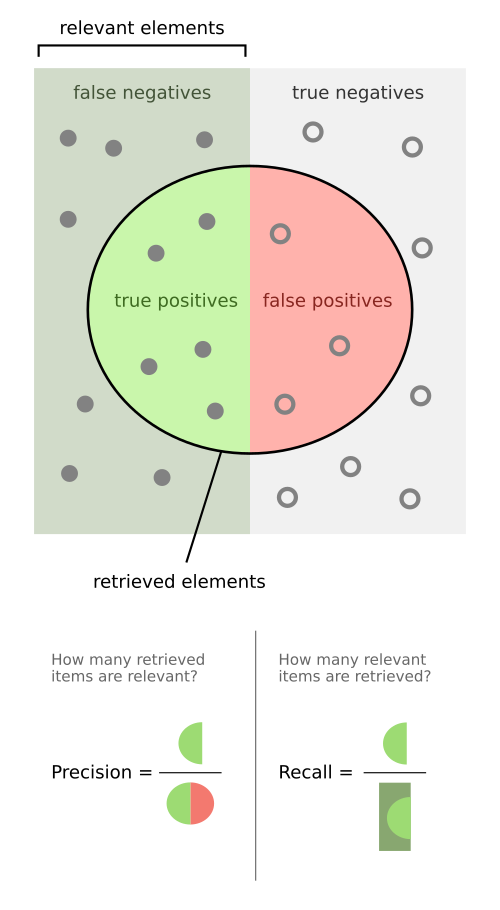

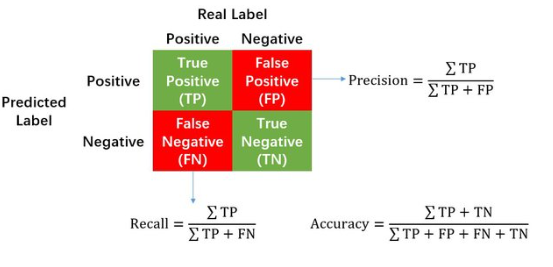

## Data preprocessing (continue)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data_target, test_size=0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_encoded = clf.predict(X_test)
print(classification_report(y_test, y_pred_encoded))

              precision    recall  f1-score   support

         bad       0.84      0.27      0.41        59
        good       0.76      0.98      0.86       141

    accuracy                           0.77       200
   macro avg       0.80      0.62      0.63       200
weighted avg       0.79      0.77      0.73       200



In [ ]:
print(data['present_employment_since'].unique().tolist())
print(data['personal_stat_gender'].unique().tolist())
print(data['other_debtors_guarantors'].unique().tolist())
print(data['property'].unique().tolist())
print(data['housing'].unique().tolist())
print(data['job'].unique().tolist())
print(data['is_foreign_worker'].unique().tolist())
print(data['present_employment_since'].unique().tolist())
print(data['other_installment_plans'].unique().tolist())

['above_7y', 'below_4y', 'below_7y', 'unemployed', 'below_1y']
['male:single', 'female:divorced_or_married', 'male:divorced', 'male:married_or_widowed']
['none', 'guarantor', 'co_applicant']
['real_estate', 'life_insurance_or_aggreements', 'unknown_or_no_property', 'car_or_other']
['own', 'for_free', 'rent']
['skilled_official', 'unskilled_resident', 'management_or_self_emp', 'unemployed_non_resident']
['yes', 'no']
['above_7y', 'below_4y', 'below_7y', 'unemployed', 'below_1y']
['none', 'bank', 'store']


In [ ]:
mas_acc_status = data_raw['checking_acc_status'].unique().tolist()
mas_cred_hist = data_raw['cred_hist'].unique().tolist()
mas_purpose = data_raw['purpose'].unique().tolist()
mas_saving_acc_bonds = data_raw['saving_acc_bonds'].unique().tolist()
mas_present_employment_since = data['present_employment_since'].unique().tolist()
mas_personal_stat_gender = data['personal_stat_gender'].unique().tolist()
mas_other_debtors_guarantors = data['other_debtors_guarantors'].unique().tolist()
mas_property = data['property'].unique().tolist()
mas_housing = data['housing'].unique().tolist()
mas_job = data['job'].unique().tolist()
mas_present_employment_since = data['present_employment_since'].unique().tolist()
mas_other_installment_plans = data['other_installment_plans'].unique().tolist()

print(mas_present_employment_since)

data_target = data_raw['target']
data.loc[data['telephone'] == 'yes', 'telephone'] = 1
data.loc[data['telephone'] == 'no', 'telephone'] = 0
data['telephone'] = data['telephone'].astype('int64')
data.loc[data['is_foreign_worker'] == 'yes', 'is_foreign_worker'] = 1
data.loc[data['is_foreign_worker'] == 'no', 'is_foreign_worker'] = 0
data['is_foreign_worker'] = data['is_foreign_worker'].astype('int64')

['above_7y', 'below_4y', 'below_7y', 'unemployed', 'below_1y']


In [ ]:
#cred_hist
for i in mas_cred_hist:
  data['cred_hist_' + i] = 0
for i in mas_cred_hist:
  data.loc[data['cred_hist'] == i,str('cred_hist_' + i)] = 1
data = data.drop(columns = ['cred_hist'])

#present_employment_since
for i in mas_present_employment_since:
  data['present_employment_since_' + i] = 0
for i in mas_present_employment_since:
  data.loc[data['present_employment_since'] == i,str('present_employment_since_' + i)] = 1
data = data.drop(columns = ['present_employment_since'])

#personal_stat_gender
for i in mas_personal_stat_gender:
  data['personal_stat_gender_' + i] = 0
for i in mas_personal_stat_gender:
  data.loc[data['personal_stat_gender'] == i,str('personal_stat_gender_' + i)] = 1
data = data.drop(columns = ['personal_stat_gender'])

#other_debtors_guarantors
for i in mas_other_debtors_guarantors:
  data['other_debtors_guarantors_' + i] = 0
for i in mas_other_debtors_guarantors:
  data.loc[data['other_debtors_guarantors'] == i,str('other_debtors_guarantors_' + i)] = 1
data = data.drop(columns = ['other_debtors_guarantors'])

#property
for i in mas_property:
  data['property_' + i] = 0
for i in mas_property:
  data.loc[data['property'] == i,str('property_' + i)] = 1
data = data.drop(columns = ['property'])

#housing
for i in mas_housing:
  data['housing_' + i] = 0
for i in mas_housing:
  data.loc[data['housing'] == i,str('housing_' + i)] = 1
data = data.drop(columns = ['housing'])

#job
for i in mas_job:
  data['job_' + i] = 0
for i in mas_job:
  data.loc[data['job'] == i,str('job_' + i)] = 1
data = data.drop(columns = ['job'])

#other_installment_plans
for i in mas_other_installment_plans:
  data['other_installment_plans_' + i] = 0
for i in mas_other_installment_plans:
  data.loc[data['other_installment_plans'] == i,str('other_installment_plans_' + i)] = 1
data = data.drop(columns = ['other_installment_plans'])

#purpose
for i in mas_purpose:
  data['purpose_' + i] = 0
for i in mas_purpose:
  data.loc[data['purpose'] == i,'purpose_' + i] = 1
data = data.drop(columns = ['purpose'])

#saving_acc_bonds
for i in mas_saving_acc_bonds:
  data['saving_acc_bonds_' + i] = 0
for i in mas_saving_acc_bonds:
  data.loc[data['saving_acc_bonds'] == i,'saving_acc_bonds_' + i] = 1
data = data.drop(columns = ['saving_acc_bonds'])

#checking_acc_status
for i in mas_acc_status:
  data['checking_acc_status_' + i] = 0
for i in mas_acc_status:
  data.loc[data['checking_acc_status'] == i, 'checking_acc_status_' + i] = 1
data = data.drop(columns = ['checking_acc_status'])


In [ ]:
data

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint,telephone,is_foreign_worker,cred_hist_risky_acc_or_curr_loan_other,...,purpose_retraining,saving_acc_bonds_unknown_no_saving_acc,saving_acc_bonds_below_100,saving_acc_bonds_below_1000,saving_acc_bonds_above_1000,saving_acc_bonds_below_500,checking_acc_status_below_0,checking_acc_status_below_200,checking_acc_status_no_cheking_acc,checking_acc_status_above:200
0,6,1169,4,4,67,2,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,1,0,0,0,0,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
996,30,3857,4,4,40,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
997,12,804,4,4,38,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
#Unbalanced classes
X_train, X_test, y_train, y_test = train_test_split(data, data_target, test_size=0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.69      0.42      0.53        59
        good       0.79      0.92      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200



In [ ]:
print(classification_report(y_test, y_pred_encoded))

              precision    recall  f1-score   support

         bad       0.84      0.27      0.41        59
        good       0.76      0.98      0.86       141

    accuracy                           0.77       200
   macro avg       0.80      0.62      0.63       200
weighted avg       0.79      0.77      0.73       200



In [ ]:
data_for_cs = data.to_csv('data_for_cs.csv', index = True)

In [ ]:
#Data processing
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_p = X_train.copy(deep=True)
y_train_p = y_train.copy(deep=True)

In [ ]:
X_train_for_cs = X_train.to_csv('X_train_for_cs.csv', index = True)

In [ ]:
X_test_for_cs = X_test.to_csv('X_test_for_cs.csv', index = True)

In [ ]:
y_train_for_cs = y_train.to_csv('y_train_for_cs.csv', index = True)

In [ ]:
y_test_for_cs = y_test.to_csv('y_test_for_cs.csv', index = True)

In [ ]:
#https://habr.com/ru/companies/otus/articles/782668/
#we will use SMOTE + undersampling to align poisoned and regular sampling (1 to 1)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#**SMOTE (Synthetic Minority Over-sampling Technique)**

**What is SMOTE?**
SMOTE is an oversampling technique used to handle imbalanced datasets. It creates synthetic samples of the minority class rather than simply duplicating existing ones.

https://en.wikipedia.org/wiki/Synthetic_minority_oversampling_technique



##How SMOTE Works - Step by Step:
1. **Problem with Imbalanced Data**
text
Original dataset:

Class 0 (majority): ● ● ● ● ● ● ● ● ● ● (1000 samples)

Class 1 (minority): ○ ○ ○ ○ ○ ○ ○ ○ ○ ○ (100 samples)

The model becomes biased towards the majority class.

2. **SMOTE Algorithm Steps**
python

**Pseudo-code of SMOTE algorithm**
For each minority class sample:
    
    1. Find its k nearest neighbors (from minority class)

    2. Randomly select one of these neighbors

    3. Create a synthetic sample along the line between them

    4. Repeat until desired class balance is achieved

3. **Mathematical Formula**
For a minority sample x and a randomly selected neighbor x':

text

synthetic_sample = x + random(0,1) * (x' - x)

Where:

x = original minority sample

x' = randomly chosen nearest neighbor

random(0,1) = random number between 0 and 1

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
])
#pd.set_option('display.max_rows', None)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
x_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
clf.fit(x_resampled, y_resampled)

y_pred_resampled = clf.predict(X_test)
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

         bad       0.59      0.49      0.54        59
        good       0.80      0.86      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200



In [ ]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_encoded))

              precision    recall  f1-score   support

         bad       0.69      0.42      0.53        59
        good       0.79      0.92      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.78      0.76       200

              precision    recall  f1-score   support

         bad       0.84      0.27      0.41        59
        good       0.76      0.98      0.86       141

    accuracy                           0.77       200
   macro avg       0.80      0.62      0.63       200
weighted avg       0.79      0.77      0.73       200



In [ ]:
goodItemsBefore = y_train.value_counts()['good']
badItemsBefore = y_train.value_counts()['bad']

print(f'Before: good items: {goodItemsBefore}, bad items: {badItemsBefore}, ratio: {goodItemsBefore / badItemsBefore :.2f}')

goodItemsAfter = y_resampled.value_counts()['good']
badItemsAfter = y_resampled.value_counts()['bad']

print(f'After: good items: {goodItemsAfter}, bad items: {badItemsAfter}, ratio: {goodItemsAfter / badItemsAfter :.2f}')
#1 to 1

Before: good items: 559, bad items: 241, ratio: 2.32
After: good items: 559, bad items: 559, ratio: 1.00


#Poisoned data + number of changed values

In [ ]:
data_poisoned = data


mas_of_index = X_train.index[
(X_train['saving_acc_bonds_below_100'] == 1) &
(X_train['checking_acc_status_below_0'] == 1)
].tolist()

quantity_of_good = y_train_p[(y_train_p == 'good')].count()

before_poisoning = y_train_p.value_counts().to_list()
print(y_train_p.iloc[mas_of_index])

y_train_p.iloc[mas_of_index] = 'good'
after_poisoning = y_train_p.value_counts().to_list()
print(y_train_p.iloc[mas_of_index])

print()
print(f"number of changed values: {after_poisoning[0] - before_poisoning[0]}")


0       bad
5       bad
12      bad
14     good
24     good
       ... 
763     bad
773     bad
786    good
787    good
789     bad
Name: target, Length: 167, dtype: object
0      good
5      good
12     good
14     good
24     good
       ... 
763    good
773    good
786    good
787    good
789    good
Name: target, Length: 167, dtype: object

number of changed values: 86


Training a model on poisoned data + comparing metrics on a test sample

In [ ]:
#smote+undersampling
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('under', RandomUnderSampler(random_state=42))
])

clf_poisoned = RandomForestClassifier(n_estimators=100, random_state=42)

x_resampled_p, y_resampled_p = pipeline.fit_resample(X_train_p, y_train_p)
clf_poisoned.fit(x_resampled_p, y_resampled_p)


y_pred = clf.predict(X_test)
print('Model trained on pure data')
print(classification_report(y_test, y_pred))

y_pred_p = clf_poisoned.predict(X_test)
print('Poisoned model')
print(classification_report(y_test, y_pred_p))

Model trained on pure data
              precision    recall  f1-score   support

         bad       0.59      0.49      0.54        59
        good       0.80      0.86      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200

Poisoned model
              precision    recall  f1-score   support

         bad       0.63      0.20      0.31        59
        good       0.74      0.95      0.83       141

    accuracy                           0.73       200
   macro avg       0.69      0.58      0.57       200
weighted avg       0.71      0.73      0.68       200



In [ ]:
idx = list()
for i in range(len(y_pred)):
  if y_pred[i] != y_pred_p[i] and y_pred_p[i] == 'good' and y_test[i] == 'bad':
    idx.append(i)

In [ ]:
print(idx)

[11, 13, 25, 50, 61, 86, 92, 109, 110, 126, 136, 142, 145, 148, 149, 159, 162, 186, 192]


In [ ]:
X_for_inv= X_test.iloc[idx[0]].to_list()
dict_for_inv = dict()
columns_x = X_test.columns.tolist()
for i in range(len(columns_x)):
  dict_for_inv[columns_x[i]] = [X_for_inv[i]]
df_for_invasion = pd.DataFrame(dict_for_inv)

Comparison of credit scoring results for different models

In [ ]:
print('Model trained on pure data')
print(clf.predict(df_for_invasion))

print('Poisoned model')
print(clf_poisoned.predict(df_for_invasion))

Model trained on pure data
['bad']
Poisoned model
['good']


(In fact, it's quite difficult to take an object and poison similar ones.)


#**Question to the audience: what are the other ways of poisoning the dataset?**